In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# dataframe handling
import numpy as np
import pandas as pd

# warning handling
import warnings

# importing os library
import os

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# ML Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# reading the source file
df = pd.read_csv("Raisin.csv")

In [ ]:
# viewing data
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
df.Class.value_counts()

Class
Kecimen    399
Besni      241
Name: count, dtype: int64

In [ ]:
# dimension of the data
df.shape

(640, 8)

In [ ]:
# data information at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             640 non-null    int64  
 1   MajorAxisLength  640 non-null    float64
 2   MinorAxisLength  640 non-null    float64
 3   Eccentricity     640 non-null    float64
 4   ConvexArea       640 non-null    int64  
 5   Extent           640 non-null    float64
 6   Perimeter        640 non-null    float64
 7   Class            640 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 40.1+ KB


In [ ]:
# finding the total number of null values in each column
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [ ]:
# statistical information
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,80524.321875,407.247433,247.335136,0.768924,83561.587500,0.702867,1111.465145
std,35629.979338,106.594817,46.707390,0.092932,37194.297142,0.050465,253.259670
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.414154,619.074000
25%,55850.250000,332.408514,213.521082,0.726488,58169.250000,0.674509,930.625000
50%,72465.000000,382.773352,242.027364,0.784827,74674.000000,0.708694,1062.349000
75%,93432.750000,456.098365,273.697481,0.832148,96004.500000,0.737106,1219.349250
max,235047.000000,949.662672,492.275279,0.951082,239093.000000,0.835455,2352.029000


Cleaning Outliers

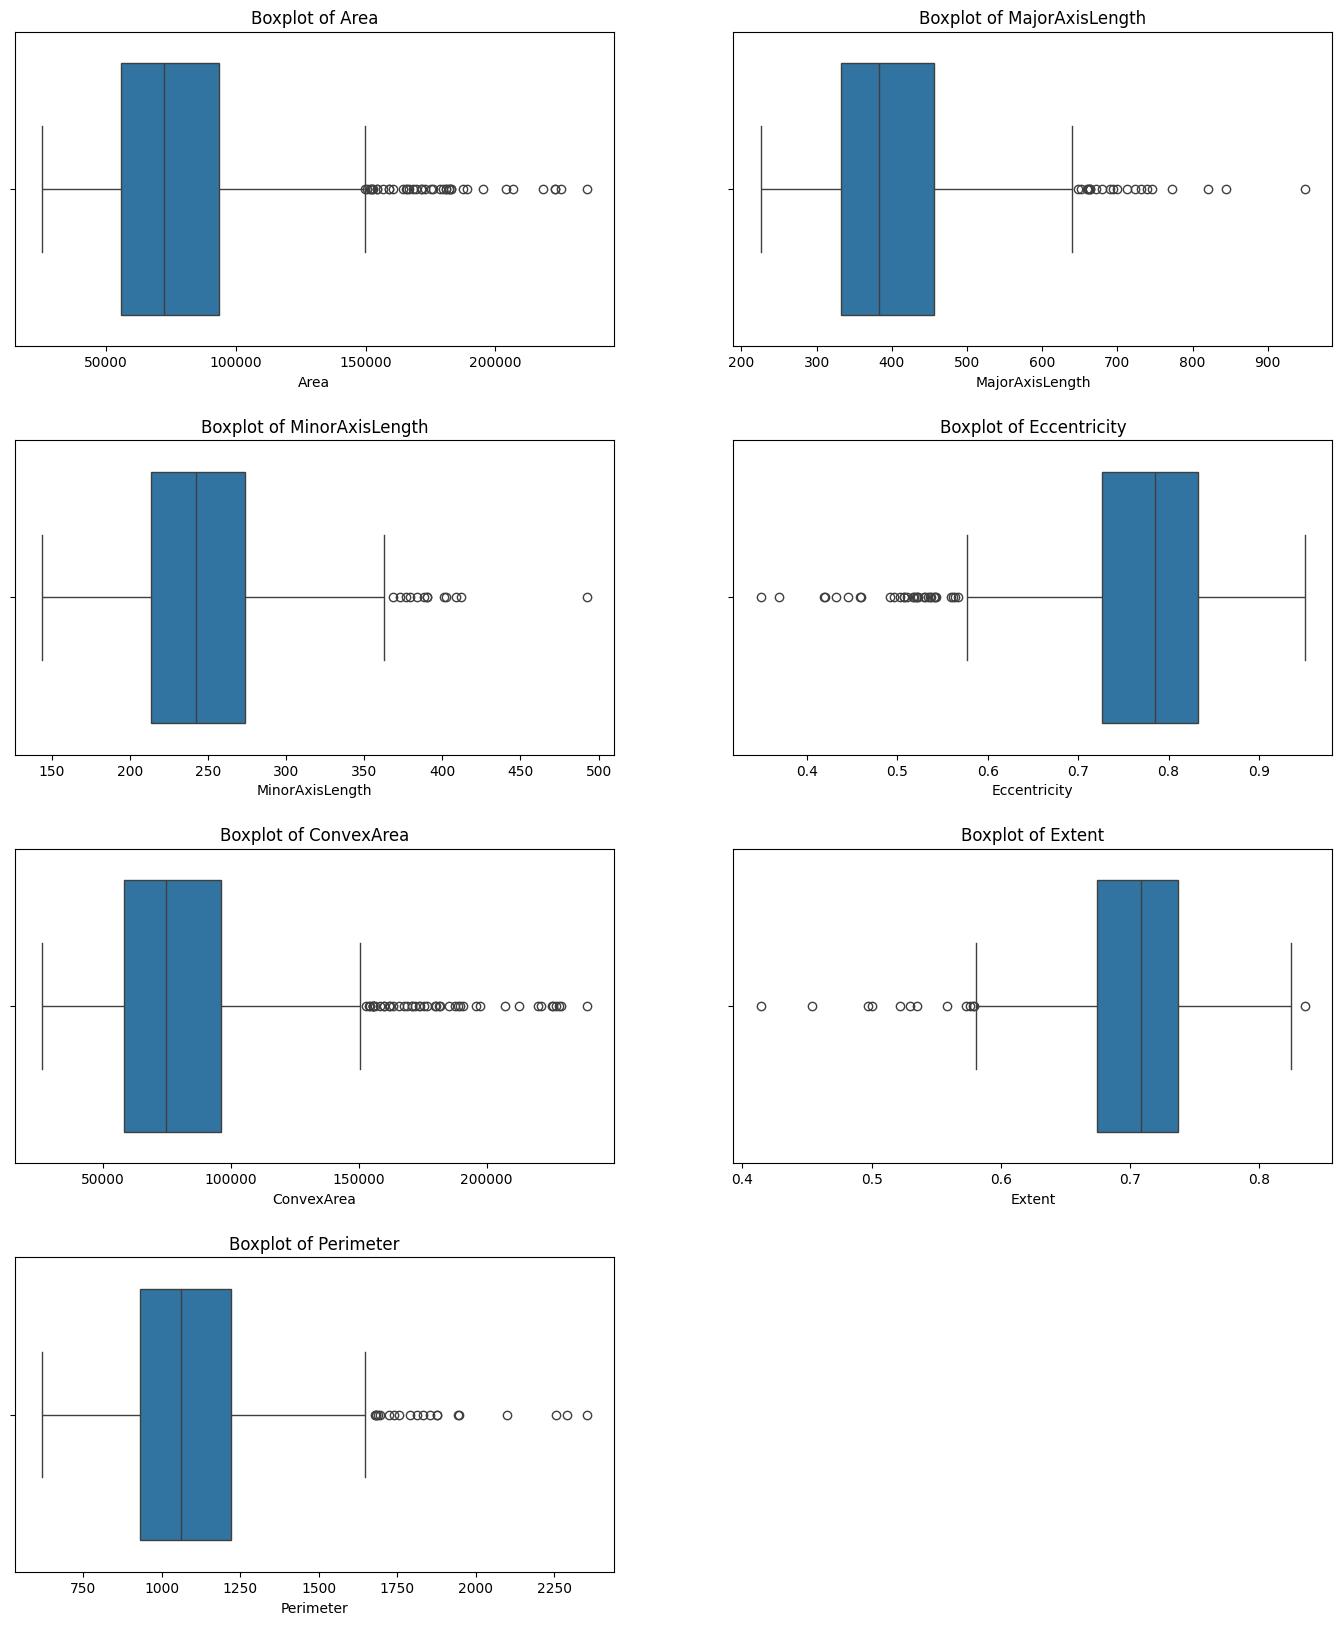

In [ ]:
# defining features excluding the 'Class' column
features = df.columns[df.columns != 'Class']

# declaring total number of rows and columns
rows = 4
cols = 2

# creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(17, 5*rows))

# Flatten the axes if necessary
axes = axes.flatten()

# horizontal space between boxplots
plt.subplots_adjust(hspace=0.3)

# plotting individual boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

# removing empty subplots if the number of features doesn't perfectly fit into the grid
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

In [ ]:
# defining function to replace outliers
def replace_outliers_with_bounds(df):
    # numeric columns
    numeric_columns = df.drop("Class", axis = 1)

    # looping through each column
    for col in numeric_columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# running function to replace outliers
df = replace_outliers_with_bounds(df)

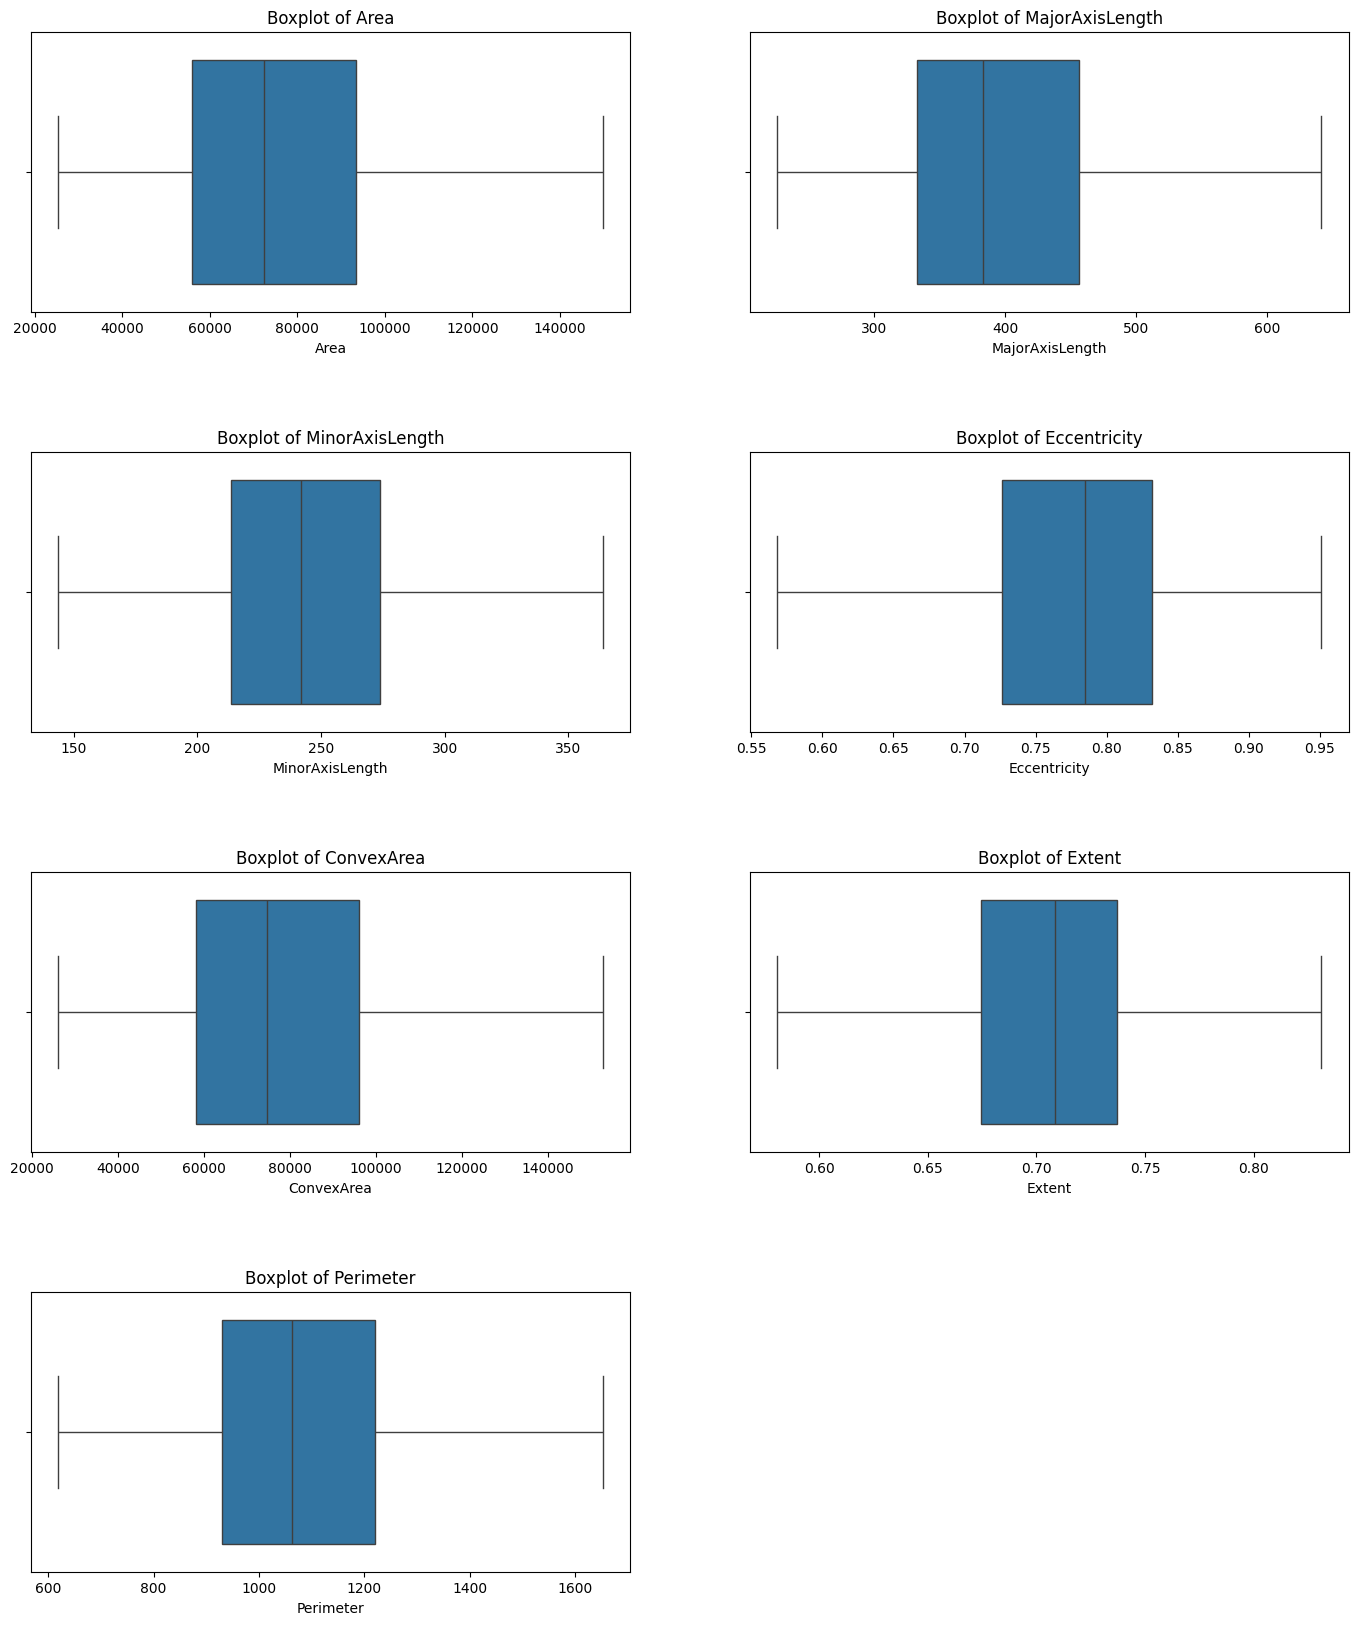

In [ ]:
features = df.columns[df.columns != 'Class']
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5*num_rows))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

Label Encoding

In [ ]:
# creating a label encoder class
label_encoder = LabelEncoder()

# encoding
df['Class'] = label_encoder.fit_transform(df['Class'])

In [ ]:
# viewing data
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.567998,81463.0,0.792772,1073.251,1


In [ ]:
# viewing data
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
635,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,0
636,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,0
637,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,0
638,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,0
639,85609.0,512.081774,215.271976,0.907345,89197.0,0.632020,1272.862,0


Generating Synthetic Data to Balance

In [ ]:
df.Class.value_counts()

Class
1    399
0    241
Name: count, dtype: int64

In [ ]:
train = df[df.Class == 0].copy()
train.drop(columns=['Class'], inplace=True)
train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
399,82462.0,434.571220,244.457453,0.826780,85611.000,0.649911,1174.203
400,53325.0,351.203707,197.213642,0.827452,56030.000,0.706142,934.490
401,149806.5,595.107096,330.342751,0.831785,152757.375,0.671309,1608.599
402,40702.0,274.168954,191.378387,0.716068,41924.000,0.721615,771.797
403,81480.0,434.100259,242.701751,0.829106,84581.000,0.674012,1162.370
...,...,...,...,...,...,...,...
635,83248.0,430.077308,247.838695,0.817263,85839.000,0.668793,1129.072
636,87350.0,440.735698,259.293149,0.808629,90899.000,0.636476,1214.252
637,99657.0,431.706981,298.837323,0.721684,106264.000,0.741099,1292.828
638,93523.0,476.344094,254.176054,0.845739,97653.000,0.658798,1258.548


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K
import matplotlib.pyplot as plt

gen = None

# Custom loss function
def custom_loss(y_true, y_pred):
    return K.mean(K.round(K.maximum(y_pred, 1.0)) - y_true)

# Define generator model
def build_generator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(64,activation ='relu'))
    model.add(Dense(dim, activation='sigmoid'))
    return model

    return model

# Define discriminator model
def build_discriminator(dim):
    model = Sequential()
    model.add(Dense(128, input_dim=dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build GAN model
def build_gan(generator, discriminator, gen_optimizer, disc_optimizer):
    discriminator.trainable = False
    gan_input = generator.input
    gan_output = discriminator(generator.output)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer=gen_optimizer, loss='binary_crossentropy')
    discriminator.trainable = True
    discriminator.compile(optimizer=disc_optimizer, loss='binary_crossentropy')
    return gan

# Train GAN function
def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=128):
    g_losses = []
    d_losses = []
    lowest_accuracy = float('inf')  # Initialize with infinity
    best_gan = None  # Initialize with None
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))
        fake_data = generator.predict(noise)


        # Select a random batch of real data
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]

        # Labels for fake and real data
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train discriminator
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)

        # Compute discriminator loss
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate noise for generator input
        noise = np.random.normal(0, 1, size=(batch_size, generator.input_shape[1]))

        # Train generator using custom loss
        g_loss = gan.train_on_batch(noise, real_labels)

        # Append losses
        g_losses.append(g_loss)
        d_losses.append(d_loss)


        current_accuracy = min(d_loss_fake, d_loss_real)
        if current_accuracy < lowest_accuracy:
            lowest_accuracy = current_accuracy
            # Save the GAN model
            best_gan = generator

        # Print progress
        print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss}, G loss: {g_loss}]")

    # Plot losses
    plt.plot(range(1, epochs+1), g_losses, label='Generator Loss')
    plt.plot(range(1, epochs+1), d_losses, label='Discriminator Loss')
    plt.title('GAN Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return generator

def build_model(df):
  # Assuming df is your data
  X_train = df.values

  feature = df.shape[1]

  # Build generator and discriminator models
  generator = build_generator(feature)
  discriminator = build_discriminator(feature)

  # Define optimizers with different learning rates
  gen_optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
  disc_optimizer = Adam(learning_rate=0.00005, beta_1=0.5)

  # Build GAN model
  gan = build_gan(generator, discriminator, gen_optimizer, disc_optimizer)

  # Train GAN model and get the one with lowest accuracy
  best_gan_model = train_gan(generator, discriminator, gan, X_train)

  return best_gan_model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

cols = train.columns

# Apply MinMax scaling to the selected columns
train = scaler.fit_transform(train)

In [ ]:
train = pd.DataFrame(train , columns = cols)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 3ms/step
Epoch 7501/10000 [D loss: 0.6910042762756348, G loss: 0.693238377571106]
4/4 [==============================] - 0s 3ms/step
Epoch 7502/10000 [D loss: 0.6915602684020996, G loss: 0.6931166648864746]
4/4 [==============================] - 0s 3ms/step
Epoch 7503/10000 [D loss: 0.6908076703548431, G loss: 0.6930577754974365]
4/4 [==============================] - 0s 4ms/step
Epoch 7504/10000 [D loss: 0.6913630068302155, G loss: 0.6925523281097412]
4/4 [==============================] - 0s 4ms/step
Epoch 7505/10000 [D loss: 0.6912772059440613, G loss: 0.693467378616333]
4/4 [==============================] - 0s 4ms/step
Epoch 7506/10000 [D loss: 0.6910761594772339, G loss: 0.6927850246429443]
4/4 [==============================] - 0s 3ms/step
Epoch 7507/10000 [D loss: 0.6915932595729828, G loss: 0.6928122043609619]
4/4 [==============================] - 0s 3ms/step
Epoch 7508/10000 [D loss:

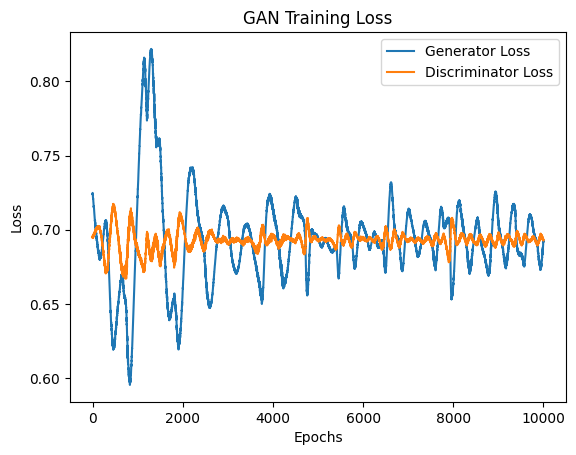

In [ ]:
generator = build_model(train)

In [ ]:
# Check if the best GAN model is available
if generator is not None:
    # Calculate the number of outputs dynamically
    num_outputs = df['Class'].value_counts().max() - df['Class'].value_counts().min()

    # Generate noise with the correct input shape
    noise = np.random.normal(0, 1, size=(num_outputs, df.shape[1]-1))  # Assuming last column is the target variable

    # Generate data using the GAN model
    generated_data = generator.predict(noise)
    generated_data = scaler.inverse_transform(generated_data)

    # Convert generated data into a DataFrame
    generated_df = pd.DataFrame(generated_data, columns=df.columns[:-1])  # Assuming last column is the target variable


    generated_df["Class"] = 0
    # Append generated data to the original DataFrame
    df_combined = pd.concat([df, generated_df], ignore_index=True)

    # Save combined DataFrame to a separate file
    df_combined.to_csv("combined_rasin.csv", index=False)

    # Display the generated data as a table
    print(df_combined)


5/5 [==============================] - 0s 4ms/step
              Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0     87524.000000       442.246011       253.291155      0.819738   
1     75166.000000       406.690687       243.032436      0.801805   
2     90856.000000       442.267048       266.328318      0.798354   
3     45928.000000       286.540559       208.760042      0.684989   
4     79408.000000       352.190770       290.827533      0.567998   
..             ...              ...              ...           ...   
793   88474.484375       408.069763       276.029358      0.774642   
794  149679.500000       640.372864       357.819702      0.836493   
795  105974.070312       448.130890       297.274292      0.769509   
796  121075.117188       496.690369       306.136993      0.787902   
797   66596.164062       352.188171       251.729202      0.737408   

        ConvexArea    Extent    Perimeter  Class  
0     90546.000000  0.758651  1184.040000      1  
1     

In [ ]:
generated_df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,111103.773438,485.586121,304.186249,0.781305,114161.570312,0.730128,1317.432251,0.0
std,27642.330078,94.148621,32.591061,0.028710,23180.882812,0.028253,180.693008,0.0
min,60270.917969,328.564636,239.434448,0.718564,71025.328125,0.638237,1002.817749,0.0
25%,87977.861328,400.827271,276.267998,0.761838,94442.742188,0.715629,1162.876312,0.0
50%,108863.652344,460.609039,305.783096,0.779757,113224.769531,0.728520,1280.284058,0.0
75%,139620.398438,580.233139,332.684502,0.796076,136772.789062,0.749459,1484.758362,0.0
max,149781.250000,641.399475,361.167816,0.855624,152527.031250,0.794519,1649.925415,0.0


In [ ]:
df[df.Class == 0].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,104251.302905,492.198229,274.624386,0.818018,107872.983921,0.696432,1307.019258,0.0
std,30950.246868,92.652187,46.324427,0.064208,31189.739312,0.052920,214.987476,0.0
min,40702.000000,274.168954,172.508389,0.567998,41924.000000,0.580614,771.797000,0.0
25%,81570.000000,430.077308,240.494190,0.784118,84581.000000,0.661008,1163.021000,0.0
50%,100186.000000,482.565578,272.970327,0.829106,104468.000000,0.703058,1272.882000,0.0
75%,132116.000000,572.705396,305.330382,0.866211,136612.000000,0.735576,1499.355000,0.0
max,149806.500000,641.633142,363.962080,0.951082,152757.375000,0.800255,1652.435625,0.0


Classification models for Balanced Data

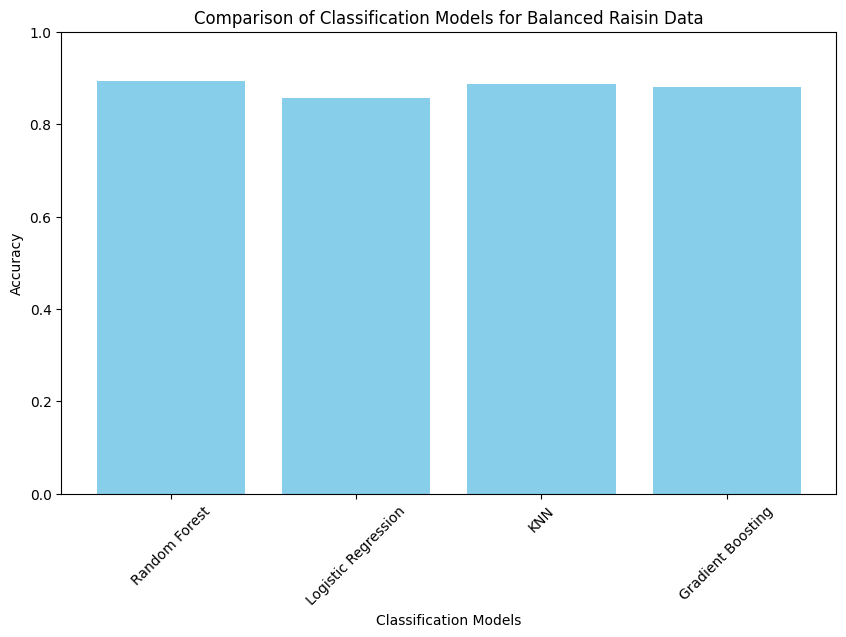

Model: Random Forest
Accuracy: 0.89375
Classification Report:
                   precision    recall  f1-score   support

  Class 0 : Besni       0.90      0.89      0.89        80
Class 1 : Kecimen       0.89      0.90      0.89        80

         accuracy                           0.89       160
        macro avg       0.89      0.89      0.89       160
     weighted avg       0.89      0.89      0.89       160

---------------------------------------------
Model: Logistic Regression
Accuracy: 0.85625
Classification Report:
                   precision    recall  f1-score   support

  Class 0 : Besni       0.86      0.85      0.86        80
Class 1 : Kecimen       0.85      0.86      0.86        80

         accuracy                           0.86       160
        macro avg       0.86      0.86      0.86       160
     weighted avg       0.86      0.86      0.86       160

---------------------------------------------
Model: KNN
Accuracy: 0.8875
Classification Report:
             

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the balanced dataset
df = pd.read_csv("combined_rasin.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Class 0 : Besni', 'Class 1 : Kecimen'])

    # Store results
    results[name] = {'accuracy': accuracy, 'classification_report': report}

# Visualize the results
accuracies = [result['accuracy'] for result in results.values()]
models_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracies, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models for Balanced Raisin Data')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Display detailed results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("---------------------------------------------")

Classification for unbalanced data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Load the balanced dataset
df = pd.read_csv("Raisin.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Remove outliers
# Calculate quartiles and IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Filter out rows with outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Label encode the target variable
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Class 0 : Besni', 'Class 1 : Kecimen'])

    # Store results
    results[name] = {'accuracy': accuracy, 'classification_report': report}

# Visualize the results
accuracies = [result['accuracy'] for result in results.values()]
models_names = list(results.keys())

plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracies, color='skyblue')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models for Unbalanced Raisin Data')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Display detailed results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['classification_report'])
    print("---------------------------------------------")

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.